## Implement the Solution partitioning solver

In [2]:
from SPSolver import ClassicalSPSolver, VRPProblem, VRPSolution

In [3]:
def load_data_from_csv(csv_path):
    """Load VRP data from CSV file"""
    print(f"Loading data from {csv_path}...")
    df = pd.read_csv(csv_path)
    
    # Ensure depot is first row
    depot = df[df['DEMAND'] == 0].iloc[0]
    customers = df[df['DEMAND'] > 0]
    df = pd.concat([depot.to_frame().T, customers])
    
    # Extract coordinates and demands
    coords = df[['XCOORD', 'YCOORD']].values
    demands = df['DEMAND'].values
    
    # Create distance matrix
    dist_matrix = squareform(pdist(coords, 'euclidean'))
    
    return coords, dist_matrix, demands

def visualize_solution(problem, solution):
    """Visualize VRP solution with enhanced plotting"""
    plt.figure(figsize=(14, 10))
    colors = plt.cm.tab10.colors
    
    # Extract coordinates
    coords = problem.coords
    depot = problem.depot_index
    
    # Plot all nodes
    plt.scatter(
        coords[1:, 0], coords[1:, 1], 
        s=problem.demands[1:]*30, 
        c='blue', 
        alpha=0.8,
        edgecolors='black',
        label='Customers'
    )
    
    # Plot depot
    plt.scatter(
        coords[depot, 0], coords[depot, 1],
        s=400,
        c='red',
        marker='s',
        edgecolors='black',
        label='Depot'
    )
    
    # Annotate customer demands
    for i in range(1, len(coords)):
        plt.annotate(
            f"{problem.demands[i]}", 
            (coords[i, 0], coords[i, 1]),
            xytext=(0, 8),
            textcoords='offset points',
            ha='center',
            fontsize=9,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7)
        )
    
    # Plot routes
    for i, route in enumerate(solution.routes):
        if len(route) > 2:  # Skip empty routes
            route_coords = coords[route]
            
            # Plot route line
            plt.plot(
                route_coords[:, 0], route_coords[:, 1],
                'o-',
                color=colors[i % len(colors)],
                linewidth=2.5,
                markersize=8,
                markerfacecolor='white',
                markeredgewidth=1.5,
                label=f"Vehicle {i+1} ({problem.capacities[i]} cap)"
            )
            
            # Add direction arrows
            for j in range(1, len(route)):
                start = route_coords[j-1]
                end = route_coords[j]
                plt.annotate(
                    "", 
                    xy=end,
                    xytext=start,
                    arrowprops=dict(
                        arrowstyle="->",
                        color=colors[i % len(colors)],
                        lw=1.5,
                        shrinkA=8,
                        shrinkB=8
                    )
                )
    
    plt.title(f"VRP Solution | Total Cost: {solution.total_cost:.2f} | Vehicles: {len(problem.capacities)}", fontsize=14)
    plt.xlabel("X Coordinate", fontsize=12)
    plt.ylabel("Y Coordinate", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best', fontsize=10)
    plt.tight_layout()
    plt.savefig("vrp_solution.png", dpi=300)
    plt.show()
    print("Solution visualization saved as 'vrp_solution.png'")

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

Loading data from dataset1.csv...
VRP Problem: 101 nodes (5 vehicles)
Total demand: 1810.0, Total capacity: 300.0
Starting VRP solver...
  TSP solved in 0.00s (Cost: 596.88)
  SPS solved in 0.16s (200 permutations)
Total solve time: 0.16s

VRP Solution (Total Cost: inf)
Vehicle 1 (60): [0, 16, 0]
Vehicle 2 (60): [0, 14, 12, 0]
Vehicle 3 (60): [0, 81, 78, 0]
Vehicle 4 (60): [0, 76, 71, 70, 0]
Vehicle 5 (60): [0, 73, 77, 79, 80, 0]


ROUTE STATISTICS
Vehicle 1 (60 capacity):
  Customers: 1
  Total demand: 40 (66.7% utilization)
  Route cost: 80.62
  Route: [0, 16, 0]
------------------------------------------------------------
Vehicle 2 (60 capacity):
  Customers: 2
  Total demand: 30 (50.0% utilization)
  Route cost: 80.44
  Route: [0, 14, 12, 0]
------------------------------------------------------------
Vehicle 3 (60 capacity):
  Customers: 2
  Total demand: 50 (83.3% utilization)
  Route cost: 100.72
  Route: [0, 81, 78, 0]
-----------------------------------------------------------

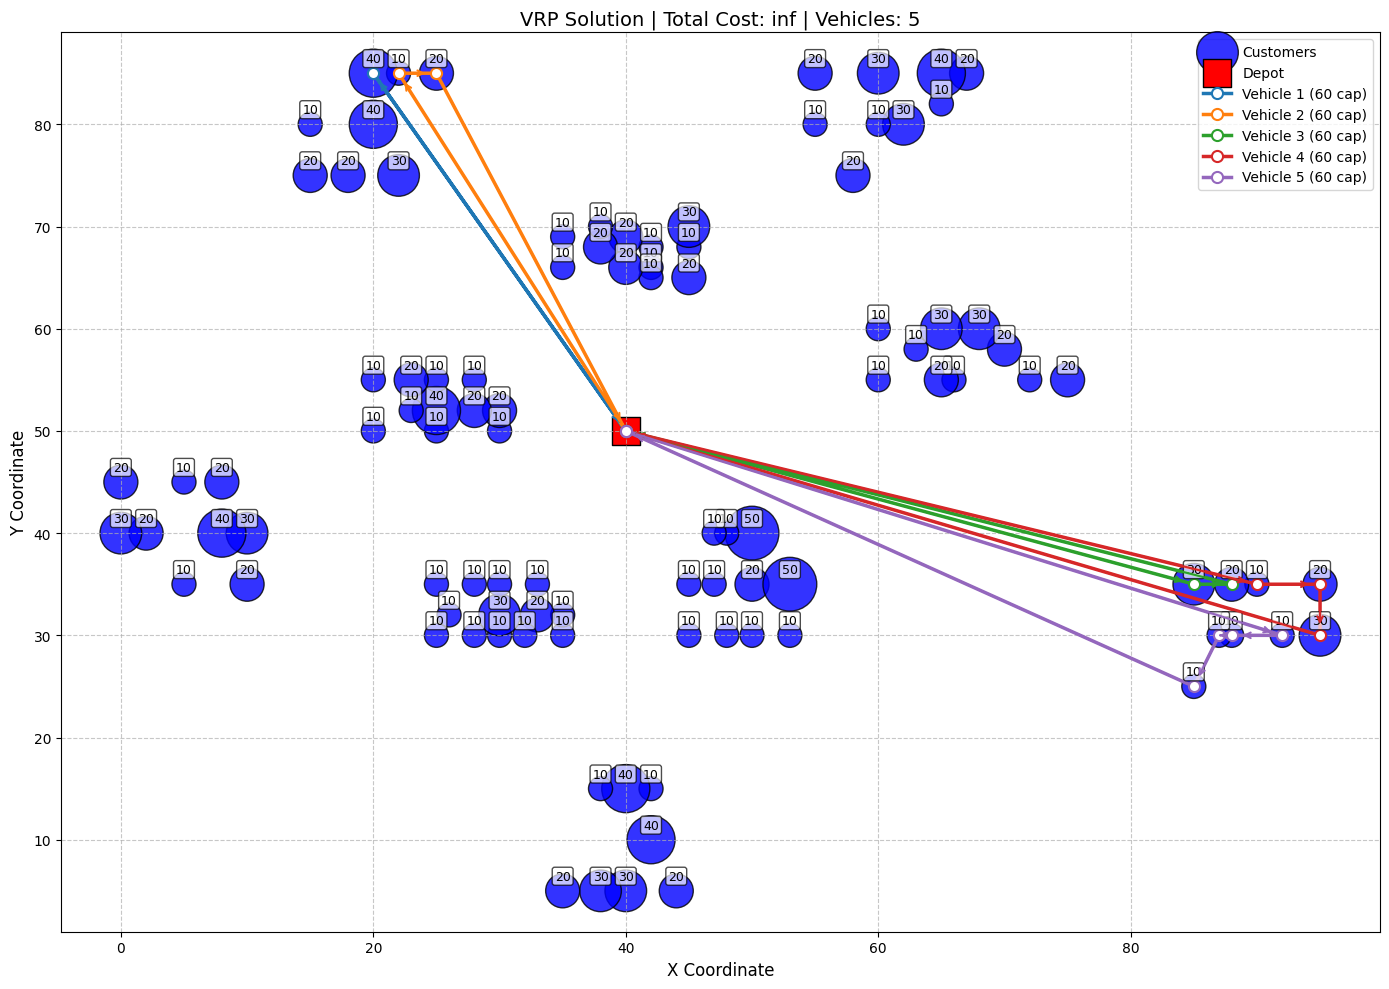

Solution visualization saved as 'vrp_solution.png'


In [21]:

# =============================
# MAIN EXECUTION
# =============================
if __name__ == "__main__":
    # Configuration
    CSV_PATH = "dataset1.csv"  # Update with your CSV file path
    VEHICLE_CAPACITIES = [60, 60, 60, 60, 60]  # Vehicle capacities
    coords, dist_matrix, demands = load_data_from_csv(CSV_PATH)
    problem = VRPProblem(
                        coords=coords,
                        dist_matrix=dist_matrix,
                        capacities=VEHICLE_CAPACITIES,
                        demands=demands)
    print(problem)
    
    # Solve using classical SPS
    solver = ClassicalSPSolver(num_permutations=200)
    solution = solver.solve(problem)
    
    # Print solution
    print("\n" + "="*60)
    print(solution)
    
    # Print detailed statistics
    print("\n" + "="*60)
    print("ROUTE STATISTICS")
    print("="*60)
    total_demand = sum(problem.demands[1:])
    total_capacity = sum(problem.capacities)
    
    for i, route in enumerate(solution.routes):
        if len(route) > 2:
            demand = sum(problem.demands[node] for node in route[1:-1])
            cost = sum(problem.dist_matrix[route[j]][route[j+1]] for j in range(len(route)-1))
            utilization = demand / problem.capacities[i] * 100
            
            print(f"Vehicle {i+1} ({problem.capacities[i]} capacity):")
            print(f"  Customers: {len(route)-2}")
            print(f"  Total demand: {demand} ({utilization:.1f}% utilization)")
            print(f"  Route cost: {cost:.2f}")
            print(f"  Route: {route}")
            print("-"*60)
    
    print(f"\nSUMMARY:")
    print(f"Total solution cost: {solution.total_cost:.2f}")
    print(f"Total customer demand: {total_demand}")
    print(f"Total vehicle capacity: {total_capacity}")
    print(f"Overall utilization: {total_demand/total_capacity*100:.1f}%")
    
    # Visualize solution
    visualize_solution(problem, solution)